<h1 id="tocheading">Проект: иcследование интернет магазина</h1>
<div id="toc"></div>

## Цель проекта
Проанализировать данные крупного интернет-магазина. При помощи приоретизации гипотез и проведения А/В-тестов мы планируем проанализировать результаты и предоставить рекомендации для увеличения выручки. 

### План работы:
[ 1. Приоретизация гипотез](#step1)

[ 2. Предобработка данных](#step2)

[ 3. Анализ А/В тестов](#step3)

[ 4. Общий вывод](#step3)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as stats
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None
pd.options.display.max_rows = None


pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None) 

In [2]:
hypothesis = pd.read_csv('hypothesis.csv')
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

## <a id="step1">1. Приоретизация гипотез</a>

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
hypothesis.columns = hypothesis.columns.str.lower()

In [5]:
# выведим и посчитаем столбец со значениями  ICE для каждой гипотезы
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [6]:
hypothesis[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.20
0,"Добавить два новых канала привлечения трафика,...",13.33
7,Добавить форму подписки на все основные страни...,11.20
6,Показать на главной странице баннеры с актуаль...,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,7.00
1,"Запустить собственную службу доставки, что сок...",2.00
5,"Добавить страницу отзывов клиентов о магазине,...",1.33
3,"Изменить структура категорий, что увеличит кон...",1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",1.00


В соответствии с фреймворком ICE наиболее приоритетными являются гипотезы под номерами 8, 0 и 7, которые имееют соответственно значения ICE 16.2, 13.3 и 11.2.

In [7]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [8]:
hypothesis[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False)

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.00
2,Добавить блоки рекомендаций товаров на сайт ин...,56.00
0,"Добавить два новых канала привлечения трафика,...",40.00
6,Показать на главной странице баннеры с актуаль...,40.00
8,"Запустить акцию, дающую скидку на товар в день...",16.20
3,"Изменить структура категорий, что увеличит кон...",9.00
1,"Запустить собственную службу доставки, что сок...",4.00
5,"Добавить страницу отзывов клиентов о магазине,...",4.00
4,"Изменить цвет фона главной страницы, чтобы уве...",3.00


- Приоретизация гипотез претерпела оперделенные изменения. Гипотезы 7 и 0 остались в первой тройке по рейтингу RICE, а вот гипотеза 8 скатидась на пятую позицию. 
- Связано это с тем, что характеристика REACH у седьмой гипотезы самая высокая (10 баллов) в то время, как у восьмой гипотезы значение этой метрики равно только единице, а у второй гипотезы тоже высокий показатель 8. Т.к охват количества пользователей, которых зактронет изменение у гипотез 7 и 2 несоизмеримо выше, чем у восьмой. Во фреймворке ICE эта характеристика не учитывается, поэтому восьмая гипотеза держала первую позицию, а во фреймворке RICE она является такой же важной как и все остальные, поэтому гипотеза 8 потеряла свою значимость. 


## <a id="step2">2. Предобработка данных </a>

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 37.5+ KB


In [10]:
# приведем столбец с датой из строкового формата к типу datetime
orders['date'] = pd.to_datetime(orders['date'])

In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ KB


In [12]:
# приведем столбец с датой к типу datetime
visitors['date'] = pd.to_datetime(visitors['date'])

In [13]:
orders.duplicated().sum()

0

In [14]:
visitors.duplicated().sum()

0

1. Как можем видеть из запросов, дубликаты отсутствуют.
2. Также, можем заметить, что NaN значения отсутствуют в двух наборах данных.

## <a id="step3">3. Проверка различных гипотез посредством А/В-тестов </a>

1. Построим график кумулятивной выручки по группам

In [15]:
# создадаим массив уникальных пар значений дат и групп посредством избавления от дубликатов
datesGroups = orders[['date','group']].drop_duplicates()

In [16]:
# таблица с агрегированными данными заказов по дням
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

In [17]:
# таблица с агрегированными данными о посетителях по дням
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

In [18]:
# объединяем кумулятивные данные по посетителям и заказам в одной таблице
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on = ['date','group'], right_on = ['date','group'])

In [19]:
cumulativeData.columns  =['date','group','orders','buyers','revenue','visitors']

In [20]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [21]:
# создаем отдельные таблички с выручкой и количеством посетителей для групп A и B
cumulativeRevenueA = cumulativeData[cumulativeData['group'] =='A'][['date','revenue','orders']]

In [22]:
cumulativeRevenueB = cumulativeData[cumulativeData['group'] =='B'][['date','revenue','orders']]

[]

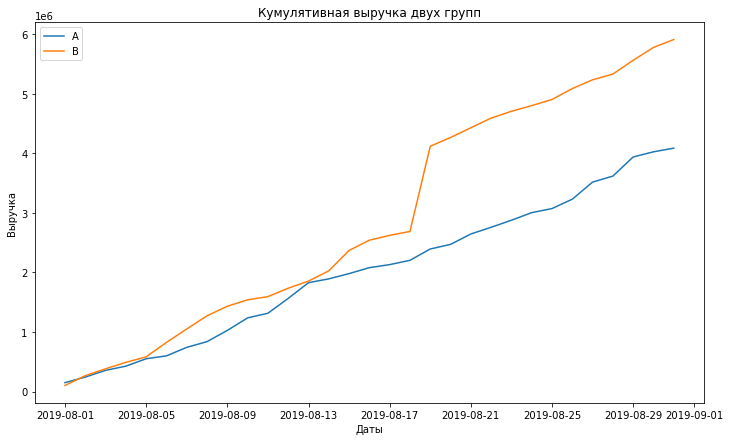

In [23]:
plt.figure(figsize=(12,7))
plt.plot(cumulativeRevenueA['date'],cumulativeRevenueA['revenue'],label ='A')
plt.plot(cumulativeRevenueB['date'],cumulativeRevenueB['revenue'],label ='B')
plt.title("Кумулятивная выручка двух групп")
plt.xlabel("Даты")
plt.ylabel("Выручка")
plt.legend()
plt.plot()

- Как можем заметить на графике, выручка обеих групп постоянно увеличивается, что является отличным знаком. 
- Выручка группы B в какой-то момент серьезно улетает вверх, что может свидетельствовать о наличии выбросов
- В целом группа В стабильно опережает группу А по выручке
- Вероятно нам потребуется больше времени, чтобы увидеть более взвешенную картину динамики изменений, т.к текущая хотя стабилизировалась во второй части теста, все равно была искажена скачками значений в группе В

2. Построим график кумулятивного чека по группам

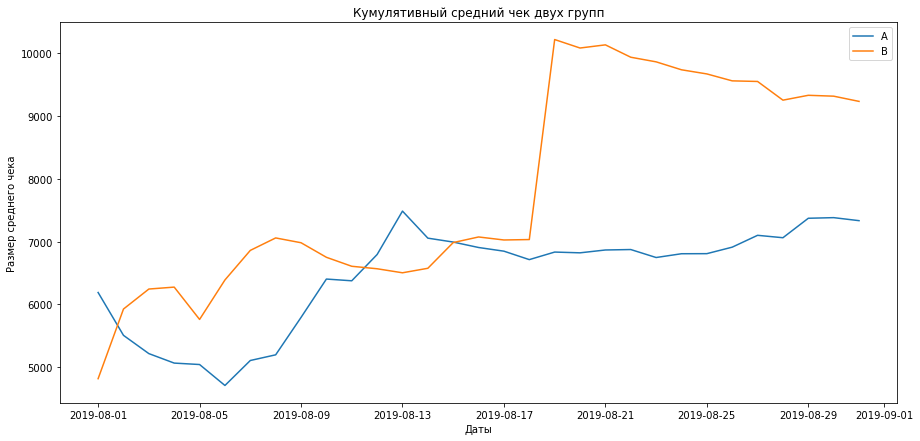

In [24]:
# проверим средний кумулятивный чек в двух группах
plt.figure(figsize=(15,7))
plt.plot(cumulativeRevenueA['date'],cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'],label = 'A')
plt.plot(cumulativeRevenueB['date'],cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'],label = 'B')
plt.title("Кумулятивный средний чек двух групп")
plt.xlabel("Даты")
plt.ylabel("Размер среднего чека")
plt.legend()
plt.show()

- Мы можем наблюдать довольно серьезные колебания в средних чеках обоих групп
- В группе В на определенном этапе наблюдается резкий скачок значений вверх, что может быть связано с выбросами, аналогичено средней выручке, а потом стабильное уменьшение
- У группы А после изначального роста показателей, значения держаться в основном на одном уровне 
- В целом группа В серьезно опережает А, но во многом это произошло за счёт серьезного скачка, в то время как значения среднего чека группа медленно, но стабильно растут, в то время как средний чек группы В стабильно падает
- Вероятно стабилизируется среднее значение показателей группы В, которое возвращается к более взвешенному показателю после заметного скачка в районе середины теста

3. Построим график относительного изменения кумулятивного среднего чека группы В к группе А

In [25]:
# сначала построим график относительного изменения кумулятивного среднего чека группы В к группе А
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on = 'date', right_on = 'date', how = 'left',\
                                                  suffixes = ['A','B'])

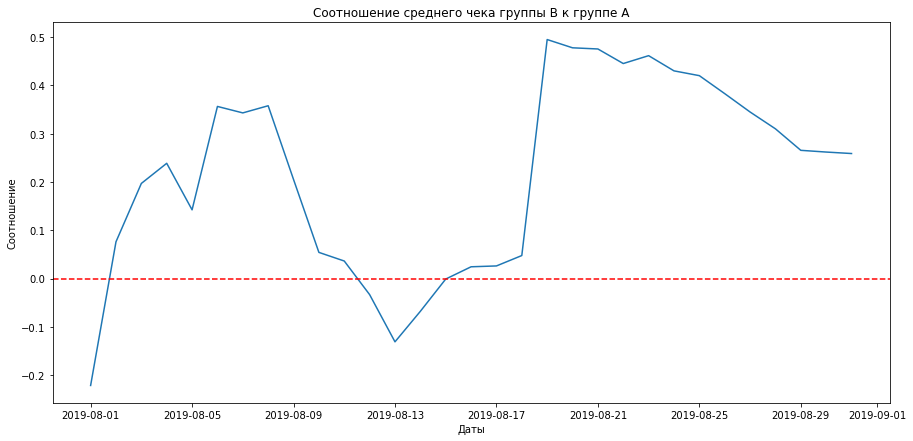

In [26]:
# построим отношения средних чеков групп
plt.figure(figsize=(15,7))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/ mergedCumulativeRevenue['ordersB']) \
        / (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color = 'red',linestyle = '--')
plt.title("Соотношение среднего чека группы В к группе А")
plt.xlabel("Даты")
plt.ylabel("Соотношение")
plt.show()

- Серьезные всплески значений между кумулятивными значениями относительного различия средних чеков между группами указывают на наличие серьёзных выбросов и крупных заказов. 

4. Построим график кумулятивной конверсии по группам.

In [27]:
# посчитаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

In [28]:
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']

In [29]:
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

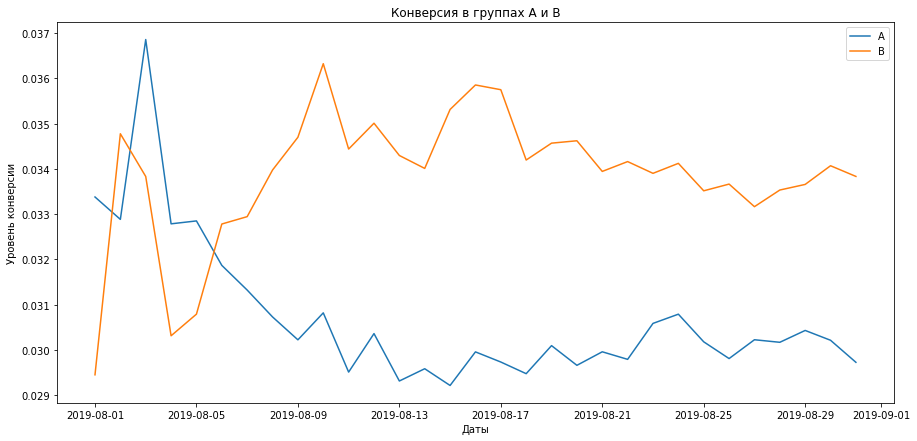

In [30]:
# построим график конверсии
plt.figure(figsize=(15,7))
plt.plot(cumulativeDataA['date'],cumulativeDataA['conversion'], label = 'A')
plt.plot(cumulativeDataB['date'],cumulativeDataB['conversion'], label = 'B')
plt.title("Конверсия в группах А и В")
plt.xlabel("Даты")
plt.ylabel("Уровень конверсии")
plt.legend()
plt.show()

- Получился достаточно симметричный график, хотя и с приличными колебаниями. Конверсия группы В стабильно превышает конверсию группы А на протяжении большей части теста. 

5. Построим график относительного различия кумулятивной конверсии группы В к группе А.

In [31]:
# создадим общую таблицу конверсий двух групп 
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
.merge(cumulativeDataB[['date','conversion']],left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A','B'])                                                                                                                                                                                                                                

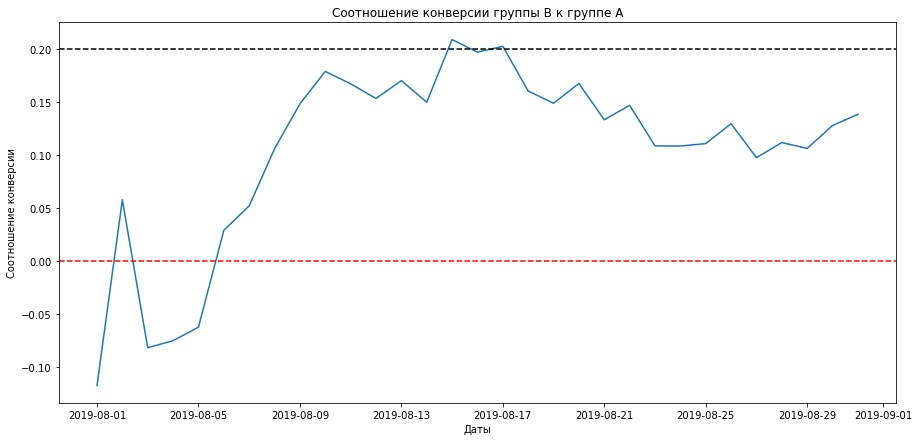

In [32]:
# построим график
plt.figure(figsize=(15,7))
plt.title('Относительный прирост конверсии группы В относительно группы А')
plt.plot(mergedCumulativeConversions['date'],\
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA'] - 1)


plt.axhline(y=0,color='red',linestyle ='--')
plt.axhline(y=0.2,color='black',linestyle ='--')
plt.title("Соотношение конверсии группы В к группе А")
plt.xlabel("Даты")
plt.ylabel("Соотношение конверсии")


plt.show()

- Можем наблюдать достаточные колебания соотношения конверсии, но в целом группа В опережает группу А. 
- Отношение это стабилизировалось примерно на уровне 0.15 и больше не колебается, как на раних этапах эксперимента

6. Построим точечный график количества заказов по пользователям. 

In [33]:
# создадим табличку с количеством заказов 
ordersByUsers = orders.drop(['date', 'revenue', 'group'],axis=1).groupby('visitorId',as_index=False)\
.agg({'transactionId':'nunique'})

In [34]:
ordersByUsers.columns=['userId','orders']

In [35]:
print(ordersByUsers.sort_values(by='orders', ascending = False).head(15))

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5
393   1614305549       4
114    457167155       4
619   2587333274       4
340   1404934699       3
937   3908431265       3


Как можем заметить только несколько пользователей имеют количество заказов большее, чем 4 

In [36]:
x_values = pd.Series(range(0,len(ordersByUsers)))

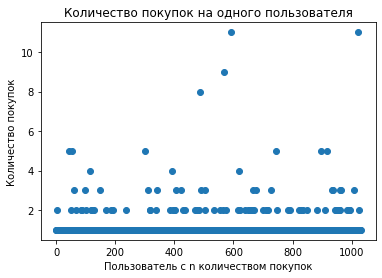

In [37]:
# отобразим на точечном графике количество заказавших пользователей
plt.scatter(x_values,ordersByUsers['orders'])
plt.title("Количество покупок на одного пользователя")
plt.xlabel("Пользователь с n количеством покупок")
plt.ylabel("Количество покупок")
plt.show()

- Как видим доля пользователей, которые совершают 2-3 заказа достаточно значительно, а вот четыре заказа уже крайне редкий случай
- Можно предположить, что три заказа  - это черта, выше которой все значения будут считаться выбросами
- Но, чтобы убедиться в верности наших убеждений, нам надо посчитать перцентили количества заказов на одного пользователя

7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [38]:
print(np.percentile(ordersByUsers['orders'],[90,95,99]))

[1. 2. 4.]


- Не более 5% пользователей оформляли более двух заказов, и не более 1% более четырех заказов
- Исходя из этого, мы выбираем 2 как нижнюю черту числа заказов 
- Все пользователи, у которых более 2х заказов будут считаться аномальными

8. Построим точечный график стоимостей заказов

In [39]:
x_values = pd.Series(range(0,len(orders['revenue'])))

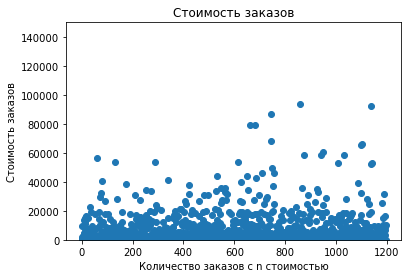

In [40]:
plt.scatter(x_values,orders['revenue'])
plt.ylim(0, 150000)
plt.title("Стоимость заказов")
plt.xlabel("Количество заказов с n стоимостью")
plt.ylabel("Стоимость заказов")
plt.show()

- По графику границу аномальных значений можем выделить в районе 30 000 - 40 000
- Для более точного определения границы нам потребуется воспользоваться персентилями стоимости заказов 

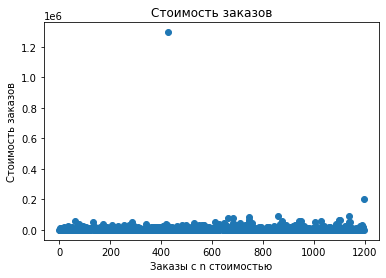

In [41]:
plt.scatter(x_values,orders['revenue'])
plt.title("Стоимость заказов")
plt.xlabel("Заказы с n стоимостью")
plt.ylabel("Стоимость заказов")
plt.show()

На общем графике стоимости заказов можем заметить, что у нас закрались огромные выбросы размером в 200 000 и 1200 000, которые искажают наши средние значения.

9. Посчитаем 95й и 99й перцентили стоимости заказов

In [42]:
print(np.percentile(orders['revenue'],[90,95,99]))

[18168.  28000.  58233.2]


- Не более 10% покупок имели стоимость 18 000
- Не более 5% покупок имели стоимость 28 00
- Не более 1% покупок имели стоиомсть 58 000
- Таким образом, все покупки, стомость которых превышает 30 000 будут считаться аномальными

10. Посчитаем различие в конверсии между группами по "сырым" данным

In [43]:
visitors.head(2)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619


In [44]:
# подневное количество посетителей
visitorsADaily = visitors[visitors['group']=='A'][['date','visitors']]

In [45]:
visitorsADaily.columns = ['date','visitorsPerDateA']

In [46]:
visitorsADaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [47]:
# посчитаем кумулятивное количество пользователей в день для группы А
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date']<=x['date']]\
                                                                    .agg({"date":'max','visitorsPerDateA':'sum'}),axis=1)
                                                                

In [48]:
visitorsACummulative.columns  = ['date','visitorsCummulativeA']

In [49]:
visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [50]:
visitorsBDaily = visitors[visitors['group']=='B'][['date','visitors']]

In [51]:
visitorsBDaily.columns = ['date','visitorsPerDateB']

In [52]:
# посчитаем кумулятивное количество пользователей в день для группы В
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date']<=x['date']]\
                                                                    .agg({"date":'max','visitorsPerDateB':'sum'}),axis=1)
                                                                

In [53]:
visitorsBCummulative.columns  = ['date','visitorsCummulativeA']

In [54]:
# теперь посчитаем подневное количество заказов
ordersADaily = orders[orders['group']=='A'][['date','transactionId','visitorId','revenue']]\
.groupby('date',as_index=False)\
.agg({'transactionId': 'nunique', 'revenue':'sum'})

In [55]:
ordersADaily.columns = ['date','ordersPerDateA','revenuePerDateA']

In [56]:
# посчитаем кумулятивные значения подневного количества заказов
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])

In [57]:
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

In [58]:
# таблица дневной прибыли и количеству юзеров в группе В
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']


In [59]:
# кумулятивное количество дневных заказов в группе В
ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [60]:
# объединим в одну табличку все посчитаные метрики
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

Посчитаем статистическую значимость различий в конверсии между группами  по "сырым" данным

In [61]:
# количество заказов на одного пользователя в группе А
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})

In [62]:
ordersByUsersA.columns = ['userId','orders']

In [63]:
# количество заказов на одного пользователя в группе В
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})

In [64]:
ordersByUsersB.columns = ['userId','orders']

Для проверки Манна-Уитни создадим две переменные sampleA и sampleB в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто без заказов будут соответствовать нули.

In [65]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']\
.sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)



In [66]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']\
.sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

- Нулевая гипотеза(Но) гласит о том, что между конверсиями двух групп не существует значимых различий. Альтернативная гипотеза (Н1) же утверждает, что конверсии групп статистически значимо отличаются на уровне значимости 0.05. 

- Для проверки наличия статически значимого различия мы будем использовать U-критерий Манна — Уитни  

In [67]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

0.008


In [68]:
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.138


1. По "сырым" данным мы можем заключить, что между конверсиями двух групп существуют статистические значимые различия, т.к p-value значительно меньше 0.05, соответственно у нас есть серьёзные основания отвергнуть нулевую гипотезу. 
2. Показатель в 13.8 процентов говорит о силе различия: конверсия группы В на 13.8% больше конверсии группы А.

-  По результатам теста мы отвергаем нулевую гипотезу, т.к тест показал значение, которое значительно ниже, чем установленный уровень значимости. 

11. Расчитаем наличие различий между группами в среднем чеке (по "сырым" данным)

- Нулевая гипотеза(Но) гласит о том, что между значениями средних чеков двух групп не существует статистически значимых различий. Альтернативная гипотеза (Н1) же утверждает, что средние чеки групп статистически значимо отличаются на уровне значимости 0.05. 

In [69]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))


0.365


In [70]:
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.259


1. Средние чеки двух групп статистически не различаются, т.к p-value значительно больше 0.05 и соответственно у нас нет оснований отвергать нулевую гипотезу. 
2. Средний чек группы В на 25.9% больше среднего чека группы А.

После сравнения конверсии и среднего чека двух групп опираясь на "сырые" данные, мы можем перейти к сравнению этих же метрик в уже очищенных данных.

12. Рассчитаем конверсию между группами на основе "очищенных" данных.

In [72]:
# выделим переменную с пользователями, которых больше двух покупок
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],\
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)


In [73]:
# выделим пользователей у которых заказы стоимостью более 28 000
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']


In [74]:
# объединим юзеров с дорогими заказами и большим количеством покупок
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

In [75]:
print(abnormalUsers.shape)

(74,)


Итого, у нас 74 аномальных пользователя, от которых следует избавиться.

In [76]:
# отфильтруем пользователей в группе А
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],\
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

In [77]:
# отфильтруем пользователей в группе В
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],\
pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

 - Нулевая гипотеза(Но) гласит о том, что между конверсиями двух групп в "очищенных" данных не существует значимых различий. Альтернативная гипотеза (Н1) же утверждает, что конверсии групп статистически значимо отличаются на уровне значимости 0.05. 

In [78]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))


0.007


In [79]:
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.173


1. Конверсия также остаётся статистически значимой на уровне 0.007 при анализе "очищенных" данных 
2. Разница между конверсией групп еще больше увеличилось в пользу группы В и выросла с 13.8% до 17.3% при анализе "очищенных" данных

- Наша предыдущая попытка сравнения среднего чека не выявила статистически значимых различий при анализе "сырых" данных. Следует провести тот же тест, но уже с "очищенными" данными.

- Нулевая гипотеза(Но) гласит о том, что в "очищенных" данных между значениями средних чеков двух групп не существует статистически значимых различий. Альтернативная гипотеза (Н1) гласит, что средние чеки групп статистически значимо отличаются на уровне значимости 0.05. 

In [80]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))



0.369


In [81]:
print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

-0.020


1. Статически значимых различий между средними чеками двух групп по-прежнему не наблюдается и при анализе "очищенных" данных. p-value осталось на том же уровне.
2. А вот средние чеки фактически уровнялись, хотя при использовании сырых данных средний чек группы В был на 25% больше,чем у группы А. Это говорит о том, что выбросы производили значительный скос в данных, а после того, как их убрали средние чеки практически уровнялись.  

## <a id="step4">4. Общие выводы</a>

1. Мы получили статистическое значимое различие между конверсиями двух групп как по "сырым", так и по "очищенным" данным.
2. Результаты исследования также говорят о том, что относительный прирост конверсии группы В на  на 13.8% и 17.3% больше относительно группы А соответственно по "сырым" и по "очищенным" данным.
3. График различия конверсий двух групп говорит о том, что группа В значительно опережает группу А, и значения группы В установились вокруг существующего значения.
4. При сравнении средних чеков мы не получили статистически значимых различий между группами,как на сырых, так и на "очищенных" данных. Хотя избавление от выбросов привело к практически идентичным средним чекам, в то время как в сырых данных группа В имела преимущество в 25%. На графике мы видим, что преимущество группы значительно, но оно было обусловлено аномально высокими заказами, после очистки от которых мы видим идентичные значения.
5. Исходя из обнаруженных фактов тест следует остановить. Мы можем заключить, что конверсия группы В действительно выше, чем у группы А, в то время, как средние чеки не имеют статистических различий.